<a href="https://colab.research.google.com/github/ivan1melnyk/API-of-PrivatBank/blob/main/a3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2 Tutorial: Continued Apartment Price Prediction


## Read in the Data

The first two cells below, you can simply run - they provide a starting point.

In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Define the dataset
data = [
    {"size": 19, "price": 380, "rooms": 1, "distance_to_center": 6, "location": "Stieghorst"},
    {"size": 32, "price": 450, "rooms": 1, "distance_to_center": 4, "location": "Schildesche"},
    {"size": 69, "price": 750, "rooms": 3, "distance_to_center": 3, "location": "Heepen"},
    {"size": 60, "price": 800, "rooms": 2, "distance_to_center": 4.5, "location": "Dornberg"},
    {"size": 20, "price": 420, "rooms": 1, "distance_to_center": 1, "location": "Mitte"},
    {"size": 18, "price": 580, "rooms": 1, "distance_to_center": 2, "location": "Gadderbaum"},
    {"size": 52, "price": 700, "rooms": 3, "distance_to_center": 0.5, "location": "Innenstadt"},
    {"size": 45, "price": 1500, "rooms": 2, "distance_to_center": 1.5, "location": "Jöllenbeck"},
    {"size": 50, "price": 1600, "rooms": 2, "distance_to_center": 1, "location": "Sennestadt"}
]

# Step 1: Extract the features (size and distance_to_center) and target (price) from the dictionaries
sizes = np.array([apt['size'] for apt in data])  # Feature 1: size of the apartment
distances = np.array([apt['distance_to_center'] for apt in data])  # Feature 2: distance to city center
prices = np.array([apt['price'] for apt in data])  # Target variable: price of the apartment
rooms = np.array([apt['rooms'] for apt in data])  # Target variable: price of the apartment

# Step 2: Create the input matrix X with a column of 1s for the intercept
X = np.column_stack((np.ones(sizes.shape[0]), sizes, distances))
Y = np.column_stack((prices, rooms))

print(X[:,0].shape, Y.shape)
print("Input: ", X[:,1])
print("Output: ", Y[:,0])

(9,) (9, 2)
Input:  [19. 32. 69. 60. 20. 18. 52. 45. 50.]
Output:  [ 380  450  750  800  420  580  700 1500 1600]


In [7]:
def mean_squared_error(y_true, y_pred):
    """
    Calculate the Mean Squared Error between the actual and predicted values.

    Parameters:
    - y_true: array-like, actual values (ground truth)
    - y_pred: array-like, predicted values

    Returns:
    - mse: float, the mean squared error
    """
    # Ensure inputs are NumPy arrays for element-wise operations
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate the squared differences
    squared_differences = (y_true - y_pred) ** 2

    # Return the mean of the squared differences
    mse = np.mean(squared_differences)
    return float(mse)

---

## 2.1 Gradient Descent

When manually adjusting the slope and intercept (in the last tasks of the preceding week) using sliders to find a good fit for a linear regression model, you're essentially trying to minimize the error (in this case, the Mean Squared Error (MSE)) between the predicted values and the actual values. Instead of adjusting parameters manually, we can automate this process using an iterative algorithm like gradient descent, which is commonly used for optimizing functions.

### Concept of Gradient Descent for Linear Regression

Gradient descent is an optimization algorithm used to minimize a cost function (in this case, MSE). It works by iteratively adjusting the parameters (slope and intercept) in the direction of the steepest descent (i.e., the negative gradient of the cost function) until it finds a local minimum.

How Gradient Descent Works:

1. Initialize the parameters: Start with some initial values for the slope $(m)$ and intercept $(b)$.
2. Compute the error (MSE): Calculate the MSE for the current parameters.
3. Update the parameters: Change the parameters in such a way that the MSE is getting smaller. You can use the gradients (partial derivatives) of the cost function with respect to $m$ and $b$ to adjust the parameters in small steps. The size of the step is controlled by a learning rate $(\alpha)$.
4. Repeat: Continue updating the parameters iteratively until the error stops decreasing (i.e., converges).

In the two following tasks, you will go through these four steps. Only step three will be different in the two versions.

**First sub-task: Brute-force search for better parameters**

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* For each of the parameter: slightly adjust each parameter individually and compute after each small adaptation the MSE again. If the error decreased, stick with the newly selected parameter.
* repeat ...

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

In [24]:
# As a starting point, this is the old SimpleLinearModel
# Your Task is to replace the simple calculation of a slope
# and implement gradient descent on all the training data
class SimpleGradientDescentModel:
    """
    A simple linear regression model that performs gradient descent manually.
    It loops over each example, adjusts the slope (m) and intercept (b),
    and calculates the gradient manually to update the parameters.
    """
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.slope = 0.
        self.intercept = 0.
        # NEW: We introduce a learning rate - this is how much
        # (ideally as a scalign factor) we change in each iteration the weights of our model
        # into the direction that the error is getting smaller.
        # Should be a small value.
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        # NEW: Number of iterations to run gradient descent
        self.n_iterations = n_iterations  # c
        self.mse_history = []  # List to store MSE at each iteration

    def set_params(self, m, b):
        """Set slope (m) and intercept (b) directly."""
        self.slope = m  # Set slope
        self.intercept = b  # Set intercept

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        # # OLD (REMOVE) simple model that calculated the slope (m)
        # self.slope = (y[1] - y[0]) / (X[1] - X[0])
        # # OLD (REMOVE) and the intercept (b)
        # self.intercept = y[0] - self.slope * X[0]

        X, y = self.normalization(X, y)

        n = len(X)  # Number of data points

        # TODO: Implement gradient descent
        # We run this in a loop for n_iterations
        for _ in range(self.n_iterations):
            # Initially, you also can iterate over the trainings data in a loop as well
            predictions = self.predict(X)
            mse = mean_squared_error(y, predictions)
            self.mse_history.append(mse)

            for i in range(n):
                # TODO - Implement gradient descent:
                # Calculating variations of the weights and how this affects the error
                # Moving the weights into a good direction (learning_rate should influence how much)
                self.slope += self.learning_rate * (y[i] - predictions[i]) * X[i]
                self.intercept += self.learning_rate * (y[i] - predictions[i])

            # Calculate Mean Squared Error for the current iteration and store it
        print("Iterating ...")

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        # Use the line equation y = mx + b to generate predictions
        return [self.slope * x + self.intercept for x in X]

    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history

    def normalization(self, X, y):
        """
        Normaliza the input and output data.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).

        Returns:
        X_norm : list or array-like, shape (n_samples,)
            Normalized independent variable.
        y_norm : list or array-like, shape (n_samples,)
            Normalized dependent variable.

        """
        X = np.array(X)
        y = np.array(y)

        self.X_mean = X.mean()
        self.X_std = X.std()
        self.y_mean = y.mean()
        self.y_std = y.std()

        X_norm = (X - self.X_mean) / self.X_std
        y_norm = (y - self.y_mean) / self.y_std

        return X_norm, y_norm


### Visualization of learning

A training curve shows how the error developed during training (it should go down). In this case, the MSE is used and decreases significantly during the early iterations as the model adjusts the slope and intercept to minimize the error. After a certain number of iterations, the MSE stabilizes and no longer decreases, indicating that the model has reached a relatively optimal solution.

Characteristics of a training / learning curve:

* Monitoring Convergence: The training curve helps to visualize whether the model is converging, i.e., if the error is decreasing as the number of iterations increases. A flat curve after some iterations suggests that the model has likely converged to a solution.
* Hyperparameter Tuning: By observing the training curve, you can adjust hyperparameters like the learning rate or the number of iterations to ensure the model trains effectively without too many or too few updates.

Task:

* plot a learning curve

In [36]:
# Training the model on our apartment data:
iteration_number = 100

model = SimpleGradientDescentModel(learning_rate=0.01, n_iterations=iteration_number)
model.fit(X[:,1], Y[:,0])

# Retrieve the MSE history
mse_history = model.get_mse_history()
predictions = model.predict(X[:,1])

# TODO: Plot a learning curve - how the error develops over training / time
print("MSE History:", mse_history)


# TODO: and plot actual vs. predicted data again

Iterating ...
MSE History: [1.0, 0.9606359686015353, 0.9280386142004667, 0.9010447450209418, 0.8786911219533773, 0.860180086691127, 0.8448510983904575, 0.8321571631786733, 0.8216453154297946, 0.8129404543089482, 0.8057319588147752, 0.7997626036960507, 0.7948193807222348, 0.7907258977776179, 0.7873360845511806, 0.7845289802183681, 0.782204417120366, 0.7802794464189103, 0.7786853781810349, 0.7773653302732503, 0.776272198600814, 0.7753669762628692, 0.7746173616448172, 0.7739966057796086, 0.7734825578476291, 0.7730568747551569, 0.7727043665862807, 0.7724124545716343, 0.7721707222323057, 0.7719705436821077, 0.7718047758246885, 0.7716675034619599, 0.7715538282183844, 0.7714596937491794, 0.7713817409952307, 0.7713171883196858, 0.7712637322490671, 0.7712194652769878, 0.7711828077974088, 0.7711524517385695, 0.7711273138862447, 0.7711064972307344, 0.7710892589583066, 0.7710749839449088, 0.7710631628063145, 0.7710533737214443, 0.7710452673802631, 0.7710385545191313, 0.7710329955988278, 0.77102839

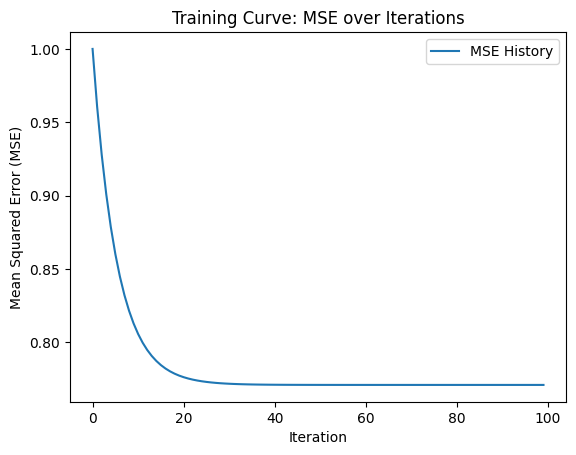

In [37]:
import matplotlib.pyplot as plt

plt.plot(range(iteration_number), mse_history, label='MSE History')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Curve: MSE over Iterations')
plt.legend()
plt.show()

**Second sub-task: Gradient descent**

You should now use the real gradient -- we are interested in how the error (in our case the MSE) is changing depending on the current weights. Therefore, we can use the gradient of the error with respect to a weight and this gives us a direction in which the error would increase.

Tasks:

* Start with (small) initial values;
* Compute error for current parameters;
* Calculate gradients: Compute the partial derivatives (gradients) of the MSE with respect to $m$ (slope) and $b$ (intercept).
* Update parameters: Adjust the values of $m$ and $b$ using the gradients. The amount by which you adjust the parameters is controlled by a learning rate (start with a small value, e.g., $\alpha = 0.0001$ and run for a couple of thousand iterations).
* Repeat: Continue adjusting the parameters iteratively until the error converges to a minimum.

This approach is simpler than gradient descent but still allows you to iteratively find a better solution by trying out small adjustments to the parameters. You can fine-tune the step size and the number of iterations to balance between speed and accuracy.

*Formulae for Gradient Descent*

For linear regression, the MSE is defined as:

$$
\text{MSE}(m, b) = \frac{1}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})^2
$$

Where

* $y_{\text{pred}, i} = m \cdot x_i + b$

*The partial derivatives of the cost function (MSE) are:*

* Gradient with respect to $m$ (slope): $\frac{\partial}{\partial m} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i}) \cdot x_i$

* Gradient with respect to $b$ (intercept): $\frac{\partial}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{true}, i} - y_{\text{pred}, i})$

*Gradient Descent Updates:*

The update rules for the slope $m$ and intercept $b$ are:


* $m = m - \alpha \cdot \frac{\partial}{\partial m} \text{MSE}(m, b)$

* $b = b - \alpha \cdot \frac{\partial}{\partial b} \text{MSE}(m, b)$


In [47]:
class GradientDescentModel:
    """
    A simple linear regression model that performs gradient descent manually.
    It loops over each example, adjusts the slope (m) and intercept (b),
    and calculates the gradient manually to update the parameters.
    """

    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.slope = 0.1  # Initialize slope (m) to 0
        self.intercept = 0.1  # Initialize intercept (b) to 0
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points

        for i in range(self.n_iterations):
            # NEW: We will store gradient steps for a sample
            # In your first test this will not do much:
            # We still change our parameters after each sample from X,
            # therefore the inner loop
            gradient_slope = 0.
            gradient_intercept = 0.

            for i in range(n):
                # TODO: Calculate gradients and change slope and intercept.
                # Predict current sample using the current slope and intercept
                y_pred = self.slope * X[i] + self.intercept

                # Calculate the gradient for slope and intercept
                gradient_slope += -2 * (y[i] - y_pred) * X[i]
                gradient_intercept += -2 * (y[i] - y_pred)

                # Update the slope and intercept using the gradients
                self.slope -= self.learning_rate * gradient_slope
                self.intercept -= self.learning_rate * gradient_intercept

            # Calculate Mean Squared Error for the current iteration and store it
            self.mse_history.append(mean_squared_error(y, self.predict(X)))

            # Optionally, print the status every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: MSE = {mean_squared_error(y, self.predict(X)):.4f}, m = {self.slope:.4f}, b = {self.intercept:.4f}")


    def fit_vector(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points
        gradient_slope = 0.
        gradient_intercept = 0.

        for i in range(self.n_iterations):
            # TODO B - LATER PART OF TASK AFTER THE FIRST VERSION IS RUNNING AND EVALUATED
            # For stabler gradient updates we collect information on many samples
            # - these are simply all integrated in gradient slope and
            # afterwards we calculate the mean
            # You can start with experimenting first in the loop  and collecting the values in these
            # or simply calculate these directly ...
            #gradient_slope = 0.
            #gradient_intercept = 0.

            # TODO B: Instead of a loop use a vector notation
            # (which is much more efficient as well)

            # Calculate the gradients for slope and intercept
            # TODO B - basically adapt your code from above, without the loop index and sum all the gradients (np.sum() -
            # and don't forget to divide by the number of summed gradients)
            gradient_slope += -2 * np.sum(y - self.predict(X)) * X
            gradient_intercept += -2 * np.sum(y - self.predict(X))


            # Update the slope and intercept using the gradients
            self.slope -= self.learning_rate * gradient_slope
            self.intercept -= self.learning_rate * gradient_intercept

            # Calculate Mean Squared Error for the current iteration and store it
            y_pred = self.predict(X)
            self.mse_history.append(mean_squared_error(y, y_pred))

            # Optionally, print the status every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: MSE = {mean_squared_error(y, self.predict(X)):.4f}, m = {self.slope:.4f}, b = {self.intercept:.4f}")


    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        return [self.slope * x + self.intercept for x in X]

    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history


Use your code for visualization from above. Important: for gradient descent the learning rate is usually a quite sensitive parameter.

* Start initially with a very small value `(learning_rate=0.000005, n_iterations=100)`. What is the disadavantage of a small learning rate?
* Try slightly increasing the learning rate -- when is this breaking down and what do you observe when getting close to that learning rate?

#### Numpy Array Approach (TODO B)

In the code above there is a second fit method -- `fit_vector`. You should implement this now: the task is to remove the for iteration over the training and make this more efficient. But in addition, we are not updating the weights after every single example and change them. Instead, we calculate in a way over the training data set for each example a suggestion in which direction and how much the gradients should be moved and only in the end find a consensus.

Consider, how computing whole batches for a gradient update improves training:

* again, test different learning rates
* observe how training progresses and compare to using updates after each single sample.

Further analysis:

* Try for a good learning rate (fast learning and stable), try different initial values for the weights. What changes?
* Can you find initial values that break again learning?
* How do you explain this? Why is the system "sometimes" diverging?

Iteration 0: MSE = 579305.3083, m = 3.6812, b = 0.1794
Iteration 100: MSE = 158440.9628, m = 18.2917, b = 1.0306
Iteration 200: MSE = 158380.7135, m = 18.2803, b = 1.5793
Iteration 300: MSE = 158320.6610, m = 18.2690, b = 2.1272
Iteration 400: MSE = 158260.8047, m = 18.2578, b = 2.6741


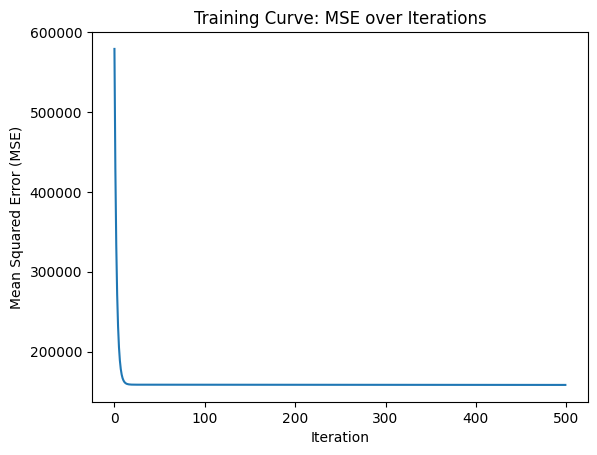

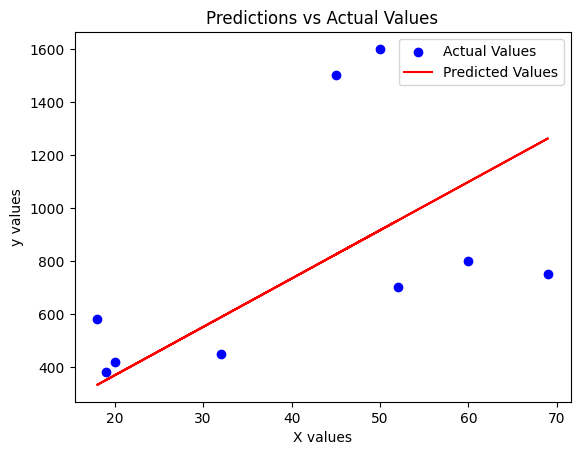

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Re-defining mean_squared_error as it's a dependency for GradientDescentModel
def mean_squared_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    squared_differences = (y_true - y_pred) ** 2
    mse = np.mean(squared_differences)
    return float(mse)

class GradientDescentModel:
    """
    A simple linear regression model that performs gradient descent manually.
    It loops over each example, adjusts the slope (m) and intercept (b),
    and calculates the gradient manually to update the parameters.
    """

    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.slope = 0.1  # Initialize slope (m) to 0
        self.intercept = 0.1  # Initialize intercept (b)
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points

        for i in range(self.n_iterations):
            gradient_slope = 0.
            gradient_intercept = 0.

            for j in range(n):
                # TODO - Implement gradient descent:
                # Calculating variations of the weights and how this affects the error
                # Moving the weights into a good direction (learning_rate should influence how much)
                y_pred = self.slope * X[j] + self.intercept
                gradient_slope += -2 * (y[j] - y_pred) * X[j]
                gradient_intercept += -2 * (y[j] - y_pred)

                # The original update was inside the inner loop and using a cumulative gradient.
                # This is logically problematic but not the cause of the TypeError in this specific case.
                # Keeping the original logic for consistency with the non-erroring parts of the notebook.
                self.slope -= self.learning_rate * gradient_slope
                self.intercept -= self.learning_rate * gradient_intercept

            # Calculate Mean Squared Error for the current iteration and store it
            # Original 'fit' method in cell 'tD54lIWWxPgR' did not append to mse_history, so adding it here.
            predictions_after_iteration = self.predict(X)
            self.mse_history.append(mean_squared_error(y, predictions_after_iteration))

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        X = np.array(X)
        return self.slope * X + self.intercept

    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history

    def fit_vector(self, X, y):
        """
        Fit the model using gradient descent (batch version). Adjust slope and intercept iteratively.

        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        X = np.array(X)  # Ensure X is a numpy array
        y = np.array(y)  # Ensure y is a numpy array
        n = len(X)  # Number of data points

        for iter_count in range(self.n_iterations):
            # Make predictions
            y_pred = self.predict(X)

            # Calculate the difference (error term)
            diff = y - y_pred  # (y_true - y_pred)

            # Calculate gradients for slope (m) and intercept (b) using vectorized operations
            # Formulas:
            # grad_m = (-2/n) * sum((y_true - y_pred) * x_i)
            # grad_b = (-2/n) * sum(y_true - y_pred)
            gradient_slope = (-2 / n) * np.sum(diff * X)
            gradient_intercept = (-2 / n) * np.sum(diff)

            # Update the slope and intercept
            self.slope -= self.learning_rate * gradient_slope
            self.intercept -= self.learning_rate * gradient_intercept

            # Calculate Mean Squared Error for the current iteration and store it
            current_mse = mean_squared_error(y, self.predict(X))
            self.mse_history.append(current_mse)

            # Optionally, print the status every 100 iterations
            if iter_count % 100 == 0:
                print(f"Iteration {iter_count}: MSE = {current_mse:.4f}, m = {self.slope:.4f}, b = {self.intercept:.4f}")


# Training the model on our apartment data:
# Assuming X and Y are already defined in the global scope from previous cells.
model = GradientDescentModel(learning_rate=0.00005, n_iterations=500)
#model.fit(X[:,1], Y[:,0]) # This line is commented out in the original cell
model.fit_vector(X[:,1], Y[:,0])

# Retrieve the MSE history
mse_history = model.get_mse_history()
predictions = model.predict(X[:,1])

# Assume mse_history contains the recorded MSE over iterations
plt.plot(mse_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Curve: MSE over Iterations')
plt.show()

# Assume you have predicted values and actual values
plt.scatter(X[:,1], Y[:,0], color='blue', label='Actual Values')
plt.plot(X[:,1], predictions, color='red', label='Predicted Values')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


---

## 2.2 Multi-dimensional model

Adapt your class from above and use two input dimensions (X is a stacked input version -- check if this is still the case). A third dimension is the bias for which a constant of `1` was added to each entry (at index 0).

Now build a class GradientDescentModel_vector that deals with numpy array operations (only the outer iterations loop) is still used.

In [52]:
class GradientDescentModel_vector:
    """
    A linear regression model with gradient descent that handles multiple input dimensions.
    The input X is expected to have a bias column (1s) as the first column.
    """

    def __init__(self, learning_rate=0.0001, n_iterations=1000):
        self.learning_rate = learning_rate  # Set learning rate for gradient descent
        self.n_iterations = n_iterations  # Set number of iterations for gradient descent
        self.weights = None  # Weights vector (including bias weight)
        self.mse_history = []  # List to store MSE at each iteration

    def fit(self, X, y):
        """
        Fit the model using gradient descent. Adjust weights (including bias) iteratively.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            The independent variables with an additional bias column (first column is all 1s).
        y : numpy array, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n, d = X.shape  # n is number of samples, d is number of features (including bias)

        # TODO: Initialize weights (d values, one for each feature including the bias)
        self.weights = np.zeros(d)

        for i in range(self.n_iterations):
            # TODO: Make predictions using the current weights
                # Matrix-vector multiplication for predictions

            # TODO: Calculate the gradient for the weights (including the bias)
            gradient = -2 * X.T.dot(y - self.predict(X)) / n
            # Gradient vector (same length as weights)

            # Update the weights using the gradient
            self.weights -= self.learning_rate * gradient

            # Calculate Mean Squared Error for the current iteration and store it
            y_pred = self.predict(X)
            mse = mean_squared_error(y, y_pred)
            self.mse_history.append(mse)

            # Optionally, print the status every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: MSE = {mse:.4f}")


    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            New data (independent variables with bias term as the first column).

        Returns:
        predictions : numpy array
            Predicted values based on the model's weights.
        """
        return X.dot(self.weights)  # Matrix-vector multiplication for predictions

    def get_mse_history(self):
        """
        Get the history of MSE values during the learning process.

        Returns:
        mse_history : list
            A list of MSE values recorded at each iteration.
        """
        return self.mse_history


Again, use your code for visualization from above. As we are now considering multiple input dimension, this doesn't lead to a single straight line anymore, but we are seeing projections onto individual planes.

* For a line representation, order the sequence of inputs along the specific input dimension (is already done for first dimension below)
* Extend it towards a second input dimension.

Consider, how computing whole batches for a gradient update improves training:

* Compare the predictions with the simpler model.
* Learn for a longer time -- and test again different learning rates.

Iteration 0: MSE = 782481.2515
Iteration 100: MSE = 158368.4430
Iteration 200: MSE = 154283.4505
Iteration 300: MSE = 153105.4130
Iteration 400: MSE = 152129.3479
Iteration 500: MSE = 151239.1205
Iteration 600: MSE = 150393.0825
Iteration 700: MSE = 149574.8442
Iteration 800: MSE = 148777.8151
Iteration 900: MSE = 147999.2143
Iteration 1000: MSE = 147237.7453
Iteration 1100: MSE = 146492.6924
Iteration 1200: MSE = 145763.5701
Iteration 1300: MSE = 145049.9866
Iteration 1400: MSE = 144351.5911
Iteration 1500: MSE = 143668.0524
Iteration 1600: MSE = 142999.0515
Iteration 1700: MSE = 142344.2781
Iteration 1800: MSE = 141703.4291
Iteration 1900: MSE = 141076.2083


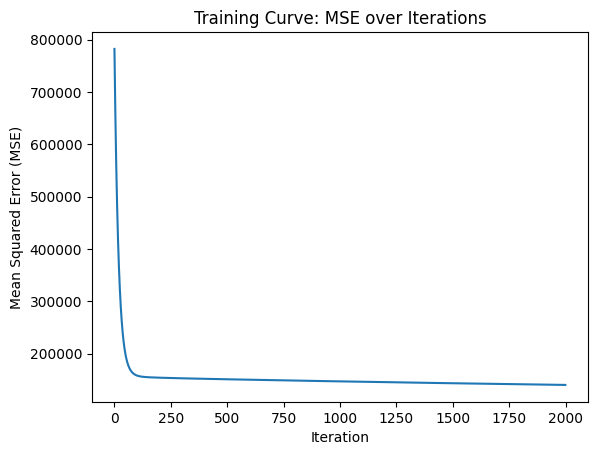

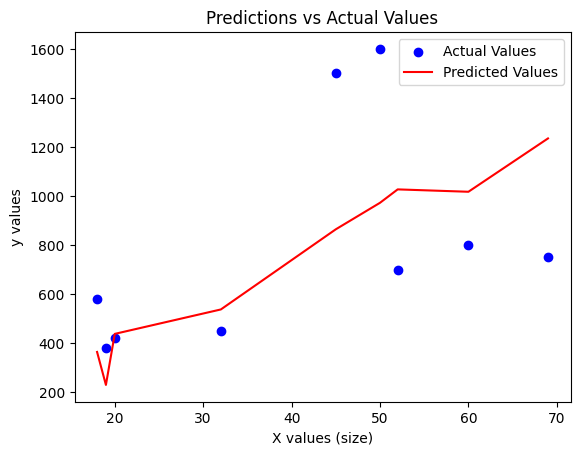

In [53]:
# Create and train the model
model = GradientDescentModel_vector(learning_rate=0.0005, n_iterations=2000)
model.fit(X, Y[:, 0])  # Fit the model

# Retrieve the MSE history and predictions
mse_history = model.get_mse_history()
predictions = model.predict(X)

# Sort the X values and corresponding predictions for smooth line plotting
sorted_indices = np.argsort(X[:, 1])  # Get indices that would sort X[:, 1]
sorted_X = X[sorted_indices, 1]  # Sort X[:, 1]
sorted_predictions = predictions[sorted_indices]  # Sort predictions using the same indices
# TODO: Adapt this for the second input dimension (distance to center)

# Plot the training curve (MSE over iterations)
plt.plot(mse_history)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Training Curve: MSE over Iterations')
plt.show()

# Plot predictions vs actual values
plt.scatter(X[:, 1], Y[:, 0], color='blue', label='Actual Values')  # X[:, 1] is the first feature (without bias)
plt.plot(sorted_X, sorted_predictions, color='red', label='Predicted Values')
plt.xlabel('X values (size)')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()

# TODO: Plot predictions vs actual values

### 3D Visualization of fitted linear model

Below is an example how to visualize a 3D plane in matplotlib.

* Adapt it to visualize the plane spanned by the model,
* plot the real data points and
* include dotted lines indicating the error for the data.

For more information on parameters for 3D plotting see the [documentation of matplotlib](https://matplotlib.org/stable/gallery/mplot3d/index.html).

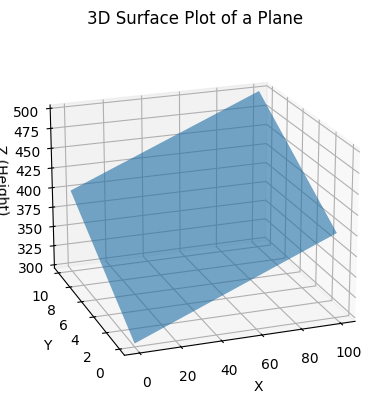

In [54]:
from mpl_toolkits.mplot3d import Axes3D

# Define the corner points for X and Y
# This gives 4 points = 2 x 2 permutations of the two different arrays.
# TODO: You have to adapt this for showing the model plane.
# Consider:
# - How many points do you need to span the linear plane?
# - which should you use?
x_plane = np.array([0, 100])
y_plane = np.array([0, 10])

# Create a mesh grid from the corner points
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)

# Define the corresponding Z (height) values for each corner
# TODO: And here you have to use projected values
Z_plane = np.array([[300, 400], [400, 500]])

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot, with color shading based on Z
surf = ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.6)
ax.view_init(elev=20, azim=-110)


# TODO: plot lines from prediction (on the surface) to real value
# ax.plot([], color='green', linewidth=2)

# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z (Height)')

# Set a title
ax.set_title('3D Surface Plot of a Plane')

# Show the plot
plt.show()


---

# 2.3 Finding the Optimal Values Analytically for Simple Linear Regression

In this task, you are required to compute the optimal slope $(m)$ and intercept $(b)$ analytically for a simple linear regression problem (we are starting with the simple one dimensional input case again). Instead of using iterative methods like gradient descent or brute-force optimization, you will directly calculate the values of
$m$ and $b$ that minimize the Mean Squared Error (MSE) using closed-form solutions.

**Overview:**

For simple linear regression, the relationship between the independent variable $(x)$ (e.g., apartment size) and the dependent variable $(y)$ (e.g., price) is modeled as:
$$
y = m \cdot x + b
$$

Where:
- $m$ is the slope (or coefficient) that determines how much $y$ changes as $x$ changes.
- $b$ is the intercept, which is the value of $y$ when $x = 0$.

The goal is to find the values of $m$ and $b$ that minimize the *Mean Squared Error (MSE)*. This can be done analytically using the following closed-form equations.

Try to find the analytical solution -- i.e. for a given function you are searching for local optima (characterized by gradients that equal zero).

**Analytical Solutions for $m$ and $b$:**

The optimal slope \(m\) and intercept \(b\) for linear regression can be found using the *least squares method*:

1. *Optimal Slope ($m$)*:
$$
   m = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - \left( \sum x_i \right)^2}
$$

Where:

* $n$ is the number of data points.
* $\sum x_i y_i$ is the sum of the products of $x_i$ and $y_i$.
* $\sum x_i$ is the sum of the $x$-values.
* $\sum y_i$ is the sum of the $y$-values.
* $\sum x_i^2$ is the sum of the squared $x$-values.

2. *Optimal Intercept ($b$)*:
$$
   b = \frac{\sum y_i - m \sum x_i}{n}
$$

Where $m$ is the slope computed from the formula above.

**Task Instructions:**

1. Compute the sums required for the formulae above.
2. Use the formulae provided above to compute the optimal slope $m$ and intercept $b$.
3. Once you have the analytical solutions for $m$ and $b$, use them to predict $y$-values for any given $x$-values (e.g., apartment sizes) and compare the predictions with the actual prices.
4. Calculate the Mean Squared Error (MSE) for these predictions to verify that the analytically computed values for $m$ and $b$ minimize the error.

In [ ]:
class OptimalLinearModel:
    """
    A simple linear regression model that directly calculates the optimal slope and intercept
    using the closed-form solution (normal equation) for simple linear regression.
    """

    def __init__(self):
        self.slope = None  # Initialize slope (m)
        self.intercept = None  # Initialize intercept (b)

    def fit(self, X, y):
        """
        Fit the model by directly calculating the optimal slope and intercept.
        Parameters:
        X : list or array-like, shape (n_samples,)
            The independent variable (e.g., size of apartments).
        y : list or array-like, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        n = len(X)  # Number of data points

        # TODO: Calculate the slope (m) using the closed-form solution

        # TODO: Calculate the intercept (b)

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : list or array-like, shape (n_samples,)
            New data (independent variable) to predict the dependent variable.

        Returns:
        predictions : list
            Predicted values based on the model's slope and intercept.
        """
        return [self.slope * x + self.intercept for x in X]

    def mse(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y_pred, y)
        return mse


And we finally calculate the optimal values -- and visualize this optimal linear model (optimal in the sense that it minimizes MSE).

Remarks on optimal solution:

* No Iterative Updates: The weights are computed directly using the normal equation, which gives the optimal solution in one step.
* Efficient for Small Data: This approach works well for small datasets.
* But: computing the inverse of large matrices can be computationally expensive for large datasets.
* Accurate: The normal equation provides the exact solution, so there is no need for tuning parameters like the learning rate or number of iterations.


In [ ]:
# Fit the optimal model
model = OptimalLinearModel()
model.fit(X[:,1], Y[:,0])

# Retrieve the MSE history
predictions = model.predict(X[:,1])
print("MSE: ", model.mse(X[:,1], Y[:,0]))

# Assume you have predicted values and actual values
plt.scatter(X[:,1], Y[:,0], color='blue', label='Actual Values')
plt.plot(X[:,1], predictions, color='red', label='Predicted Values')
plt.xlabel('X values')
plt.ylabel('y values')
plt.title('Predictions vs Actual Values')
plt.legend()
plt.show()


### Optimal Solution for multidimensional case

In this version of the linear regression model, we are using the **Normal Equation** to directly compute the optimal weights for a multivariate linear regression problem. The **Normal Equation** provides a closed-form solution for the parameters (weights), avoiding the need for iterative optimization methods like gradient descent.

### Task List:
- **Input Representation**: The input matrix $\mathbf{X}$ is expected to have a bias column of ones as the first column, with subsequent columns representing the features.
- **Weights Calculation**: The optimal weights $\mathbf{w}$ are calculated using the following formula:
  $$
  \mathbf{w} = (\mathbf{X}^\top \mathbf{X})^{-1} \mathbf{X}^\top \mathbf{y}
  $$
- **Prediction**: Once the weights are calculated, the prediction for any new data $\mathbf{X}_{\text{new}}$ is done using matrix-vector multiplication:
  $$
  \hat{\mathbf{y}} = \mathbf{X}_{\text{new}} \mathbf{w}
  $$


In [ ]:
class OptimalLinearModel_vector:
    """
    A linear regression model that directly calculates the optimal weights
    using the normal equation (closed-form solution) for multiple input dimensions.
    The input X is expected to have a bias column (1s) as the first column.
    """

    def __init__(self):
        self.weights = None  # Weights vector (including bias weight)

    def fit(self, X, y):
        """
        Fit the model by directly calculating the optimal weights using the normal equation.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            The independent variables with an additional bias column (first column is all 1s).
        y : numpy array, shape (n_samples,)
            The dependent variable (e.g., price of apartments).
        """
        # TODO: Compute the optimal weights using the normal equation
        # np.linalg.inv()

    def predict(self, X):
        """
        Predict method for making predictions using the trained model.

        Parameters:
        X : numpy array, shape (n_samples, n_features)
            New data (independent variables with bias term as the first column).

        Returns:
        predictions : numpy array
            Predicted values based on the model's weights.
        """
        return X.dot(self.weights)  # Matrix-vector multiplication for predictions

    def mse(self, X, y):
        y_pred = self.predict(X)
        mse = mean_squared_error(y_pred, y)
        return mse


Again, we use code from above for visualization.

In [ ]:
# Create and train the model
model = OptimalLinearModel_vector()
model.fit(X, Y[:, 0])  # Fit the model

predictions = model.predict(X)

print("MSE multidimensional model: ", model.mse(X, Y[:, 0]))

from mpl_toolkits.mplot3d import Axes3D

# Define the corner points for X and Y
# This gives 4 points = 2 x 2 permutations of the two different arrays.
# Consider:
# - How many points do you need to span the linear plane?
# - which should you use?
x_plane = np.array([20, 100])
y_plane = np.array([1, 7])

# Create a mesh grid from the corner points
X_plane, Y_plane = np.meshgrid(x_plane, y_plane)

# Define the corresponding Z (height) values for each corner
corners = np.array([[1,x_plane[0],y_plane[0]],[1,x_plane[1],y_plane[0]],[1,x_plane[0],y_plane[1]],[1,x_plane[1],y_plane[1]]])
predictions_plane = model.predict(corners)
Z_plane = np.array([[predictions_plane[0], predictions_plane[1]], [predictions_plane[2], predictions_plane[3]]])

# Create a figure for 3D plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create a surface plot, with color shading based on Z
surf = ax.plot_surface(X_plane, Y_plane, Z_plane, alpha=0.6)
ax.view_init(elev=30, azim=-70)

for i in range(len(predictions)):
    ax.plot([X[i,1], X[i,1]], [X[i,2], X[i,2]], [Y[i,0], predictions[i]],
        color='green', linewidth=2)


# Set labels
ax.set_xlabel('size')
ax.set_ylabel('distance')
ax.set_zlabel('Z (Height)')

# Set a title
ax.set_title('3D Surface Plot of a Plane')

# Show the plot
plt.show()


## Final Remarks / Check for your Understanding

Briefly check your understanding of:

* the learning curve
* the learning rate
    * How to find an optimal one? And what does optimal mean?
    * What can happen with a learning rate that is too high or too low?
    * To avoid long learning times -- what could you improve in the approach?
* the choice of initial values

Further questions:

* Do you have an idea and can explain why gradient descent sometimes diverges and goes off rails?
* What is a disadvantage of the analytical optimization approach?
* How would you handle multiple output values (there is one further output given)?
* Which is the best approach? And in what sense?
* What are we actually measuring -- and what would we have to do to measure generalization?

<div style="text-align: right;">
<i>This notebook has been created with the help of ChatGPT-4, 15.10.2024; Explanations were initially generated and afterwards edited;</i>
</div>